In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('~/hscImports_example/butler_wide_20220930-data-hscImports-lsst-backup.csv').drop(columns=['LOCAL_FOLDER', 'BUCKET_NAME', 'DESTINATION_KEY', 'CHECKSUM'])
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_5023.zip,132970322,butler_wide_20220930/data/hscImports/pdr3_wide...,0.154225,2025-09-02 23:19:12.167094,2025-09-02 23:19:12.321319
1,collated_5611.zip,127233338,butler_wide_20220930/data/hscImports/pdr3_wide...,0.938731,2025-09-02 23:36:31.312857,2025-09-02 23:36:32.251588
2,collated_5615.zip,78452082,butler_wide_20220930/data/hscImports/pdr3_wide...,0.148706,2025-09-02 23:36:47.171040,2025-09-02 23:36:47.319746
3,collated_5723.zip,115776630,butler_wide_20220930/data/hscImports/pdr3_wide...,0.345685,2025-09-02 23:40:15.678156,2025-09-02 23:40:16.023841
4,collated_5922.zip,132224290,butler_wide_20220930/data/hscImports/pdr3_wide...,0.130695,2025-09-02 23:46:06.501179,2025-09-02 23:46:06.631874
...,...,...,...,...,...,...
10546,collated_1524.zip,98502450,butler_wide_20220930/data/hscImports/pdr3_wide...,0.288147,2025-09-03 12:46:05.467440,2025-09-03 12:46:05.755587
10547,collated_5553.zip,113139350,butler_wide_20220930/data/hscImports/pdr3_wide...,0.076771,2025-09-03 12:46:05.649381,2025-09-03 12:46:05.726152
10548,collated_4964.zip,134048350,butler_wide_20220930/data/hscImports/pdr3_wide...,0.088654,2025-09-03 12:46:06.021576,2025-09-03 12:46:06.110230
10549,collated_4849.zip,105899278,butler_wide_20220930/data/hscImports/pdr3_wide...,0.081799,2025-09-03 12:46:05.899330,2025-09-03 12:46:05.981129


In [4]:
df['OVERLAP'] = df['UPLOAD_END'].shift(1) > df['UPLOAD_START']
df[df['OVERLAP'] == False]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
0,collated_5023.zip,132970322,butler_wide_20220930/data/hscImports/pdr3_wide...,0.154225,2025-09-02 23:19:12.167094,2025-09-02 23:19:12.321319,False
1,collated_5611.zip,127233338,butler_wide_20220930/data/hscImports/pdr3_wide...,0.938731,2025-09-02 23:36:31.312857,2025-09-02 23:36:32.251588,False
2,collated_5615.zip,78452082,butler_wide_20220930/data/hscImports/pdr3_wide...,0.148706,2025-09-02 23:36:47.171040,2025-09-02 23:36:47.319746,False
3,collated_5723.zip,115776630,butler_wide_20220930/data/hscImports/pdr3_wide...,0.345685,2025-09-02 23:40:15.678156,2025-09-02 23:40:16.023841,False
4,collated_5922.zip,132224290,butler_wide_20220930/data/hscImports/pdr3_wide...,0.130695,2025-09-02 23:46:06.501179,2025-09-02 23:46:06.631874,False
...,...,...,...,...,...,...,...
10536,collated_2230.zip,131763814,butler_wide_20220930/data/hscImports/pdr3_wide...,0.088397,2025-09-03 12:46:06.126671,2025-09-03 12:46:06.215068,False
10538,collated_2799.zip,130865298,butler_wide_20220930/data/hscImports/pdr3_wide...,0.081540,2025-09-03 12:46:06.002636,2025-09-03 12:46:06.084176,False
10544,collated_3920.zip,134044034,butler_wide_20220930/data/hscImports/pdr3_wide...,0.194902,2025-09-03 12:46:06.007969,2025-09-03 12:46:06.202871,False
10548,collated_4964.zip,134048350,butler_wide_20220930/data/hscImports/pdr3_wide...,0.088654,2025-09-03 12:46:06.021576,2025-09-03 12:46:06.110230,False


In [5]:
df[df['OVERLAP'] == True]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
207,collated_8922.zip,114665054,butler_wide_20220930/data/hscImports/pdr3_wide...,0.144944,2025-09-03 01:15:12.904452,2025-09-03 01:15:13.049396,True
224,collated_9022.zip,132963842,butler_wide_20220930/data/hscImports/pdr3_wide...,0.128798,2025-09-03 01:18:09.670038,2025-09-03 01:18:09.798836,True
240,collated_9124.zip,113806754,butler_wide_20220930/data/hscImports/pdr3_wide...,0.140237,2025-09-03 01:21:13.483141,2025-09-03 01:21:13.623378,True
270,collated_9314.zip,131829574,butler_wide_20220930/data/hscImports/pdr3_wide...,0.144843,2025-09-03 01:26:39.849823,2025-09-03 01:26:39.994666,True
285,collated_9410.zip,134067670,butler_wide_20220930/data/hscImports/pdr3_wide...,0.134368,2025-09-03 01:29:19.634698,2025-09-03 01:29:19.769066,True
...,...,...,...,...,...,...,...
10543,collated_1858.zip,134089474,butler_wide_20220930/data/hscImports/pdr3_wide...,0.080742,2025-09-03 12:46:05.863184,2025-09-03 12:46:05.943926,True
10545,collated_825.zip,127587758,butler_wide_20220930/data/hscImports/pdr3_wide...,0.082926,2025-09-03 12:46:05.998802,2025-09-03 12:46:06.081728,True
10546,collated_1524.zip,98502450,butler_wide_20220930/data/hscImports/pdr3_wide...,0.288147,2025-09-03 12:46:05.467440,2025-09-03 12:46:05.755587,True
10547,collated_5553.zip,113139350,butler_wide_20220930/data/hscImports/pdr3_wide...,0.076771,2025-09-03 12:46:05.649381,2025-09-03 12:46:05.726152,True


In [6]:
df['FILES_PER_ZIP'] = len(df['ZIP_CONTENTS'].iloc[0].split(',')) if df['ZIP_CONTENTS'].iloc[0] else 0
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,FILES_PER_ZIP
0,collated_5023.zip,132970322,butler_wide_20220930/data/hscImports/pdr3_wide...,0.154225,2025-09-02 23:19:12.167094,2025-09-02 23:19:12.321319,False,2
1,collated_5611.zip,127233338,butler_wide_20220930/data/hscImports/pdr3_wide...,0.938731,2025-09-02 23:36:31.312857,2025-09-02 23:36:32.251588,False,2
2,collated_5615.zip,78452082,butler_wide_20220930/data/hscImports/pdr3_wide...,0.148706,2025-09-02 23:36:47.171040,2025-09-02 23:36:47.319746,False,2
3,collated_5723.zip,115776630,butler_wide_20220930/data/hscImports/pdr3_wide...,0.345685,2025-09-02 23:40:15.678156,2025-09-02 23:40:16.023841,False,2
4,collated_5922.zip,132224290,butler_wide_20220930/data/hscImports/pdr3_wide...,0.130695,2025-09-02 23:46:06.501179,2025-09-02 23:46:06.631874,False,2
...,...,...,...,...,...,...,...,...
10546,collated_1524.zip,98502450,butler_wide_20220930/data/hscImports/pdr3_wide...,0.288147,2025-09-03 12:46:05.467440,2025-09-03 12:46:05.755587,True,2
10547,collated_5553.zip,113139350,butler_wide_20220930/data/hscImports/pdr3_wide...,0.076771,2025-09-03 12:46:05.649381,2025-09-03 12:46:05.726152,True,2
10548,collated_4964.zip,134048350,butler_wide_20220930/data/hscImports/pdr3_wide...,0.088654,2025-09-03 12:46:06.021576,2025-09-03 12:46:06.110230,False,2
10549,collated_4849.zip,105899278,butler_wide_20220930/data/hscImports/pdr3_wide...,0.081799,2025-09-03 12:46:05.899330,2025-09-03 12:46:05.981129,True,2


In [7]:
df['TYPE'] = df['LOCAL_PATH'].apply(lambda x: 'zip' if x.endswith('.zip') else 'file')
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,FILES_PER_ZIP,TYPE
0,collated_5023.zip,132970322,butler_wide_20220930/data/hscImports/pdr3_wide...,0.154225,2025-09-02 23:19:12.167094,2025-09-02 23:19:12.321319,False,2,zip
1,collated_5611.zip,127233338,butler_wide_20220930/data/hscImports/pdr3_wide...,0.938731,2025-09-02 23:36:31.312857,2025-09-02 23:36:32.251588,False,2,zip
2,collated_5615.zip,78452082,butler_wide_20220930/data/hscImports/pdr3_wide...,0.148706,2025-09-02 23:36:47.171040,2025-09-02 23:36:47.319746,False,2,zip
3,collated_5723.zip,115776630,butler_wide_20220930/data/hscImports/pdr3_wide...,0.345685,2025-09-02 23:40:15.678156,2025-09-02 23:40:16.023841,False,2,zip
4,collated_5922.zip,132224290,butler_wide_20220930/data/hscImports/pdr3_wide...,0.130695,2025-09-02 23:46:06.501179,2025-09-02 23:46:06.631874,False,2,zip
...,...,...,...,...,...,...,...,...,...
10546,collated_1524.zip,98502450,butler_wide_20220930/data/hscImports/pdr3_wide...,0.288147,2025-09-03 12:46:05.467440,2025-09-03 12:46:05.755587,True,2,zip
10547,collated_5553.zip,113139350,butler_wide_20220930/data/hscImports/pdr3_wide...,0.076771,2025-09-03 12:46:05.649381,2025-09-03 12:46:05.726152,True,2,zip
10548,collated_4964.zip,134048350,butler_wide_20220930/data/hscImports/pdr3_wide...,0.088654,2025-09-03 12:46:06.021576,2025-09-03 12:46:06.110230,False,2,zip
10549,collated_4849.zip,105899278,butler_wide_20220930/data/hscImports/pdr3_wide...,0.081799,2025-09-03 12:46:05.899330,2025-09-03 12:46:05.981129,True,2,zip


In [8]:
len(df[df['TYPE'] == 'zip']), len(df[df['TYPE'] == 'file'])

(10551, 0)

In [9]:
zip_upload_time = df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum()
zip_upload_time

2568.429387

In [10]:
print(f"Total upload time for zip files: {zip_upload_time} seconds")
print(f"Average upload time for zip files: {zip_upload_time / len(df[df['TYPE'] == 'zip'])} seconds")

Total upload time for zip files: 2568.429387 seconds
Average upload time for zip files: 0.24342994853568384 seconds


In [11]:
zip_total_size = df[df['TYPE'] == 'zip']['FILE_SIZE'].sum()
zip_total_size / (1024 * 1024 * 1024)

1225.5426931958646

In [12]:
print(f"Total zip file size: {zip_total_size / (1024**3)} GiB")
print(f"Average zip file size: {zip_total_size / len(df[df['TYPE'] == 'zip']) / 1024**3} GiB")

Total zip file size: 1225.5426931958646 GiB
Average zip file size: 0.11615417431483883 GiB


In [13]:
df['TRANSFER_RATE'] = df['FILE_SIZE'] / df['UPLOAD_TIME'] * 8 / (1024**3)
df['TRANSFER_RATE'].describe()

count    10551.000000
mean         6.582569
std          3.351785
min          0.030378
25%          4.031813
50%          6.523704
75%          9.245629
max         13.123619
Name: TRANSFER_RATE, dtype: float64

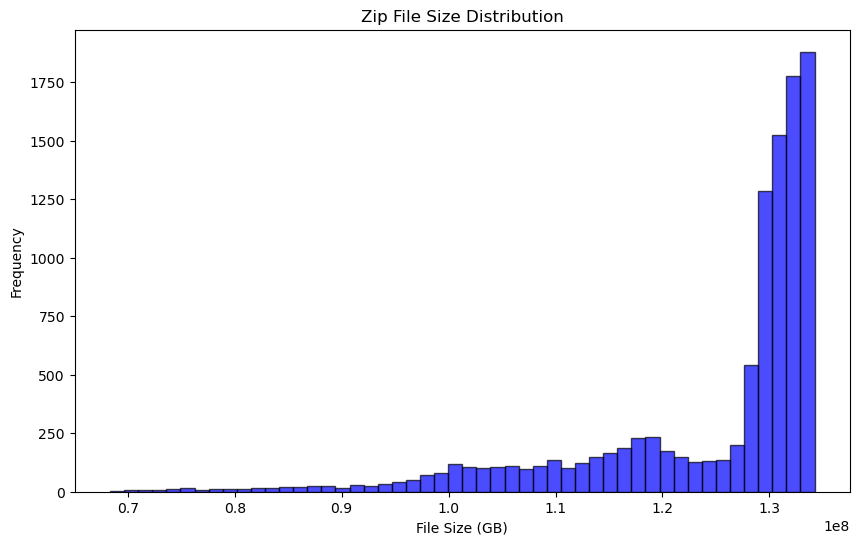

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILE_SIZE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Size Distribution')
plt.xlabel('File Size (GB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

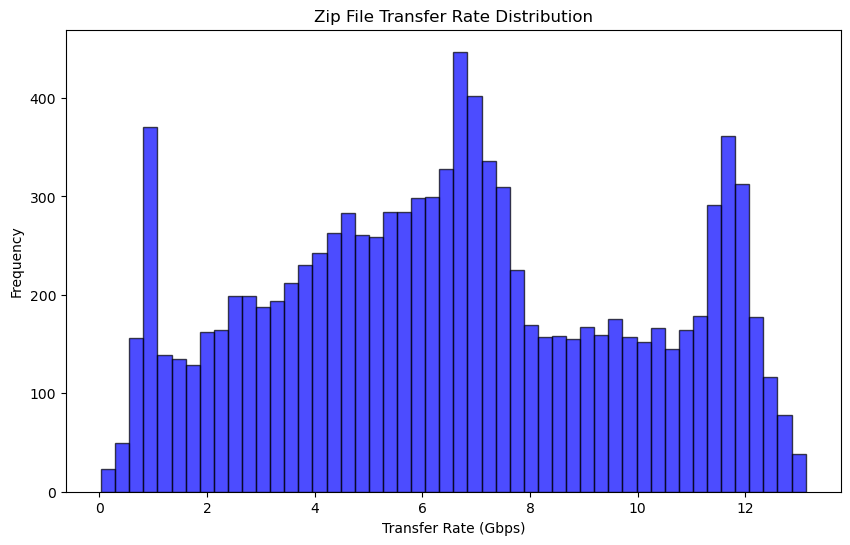

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

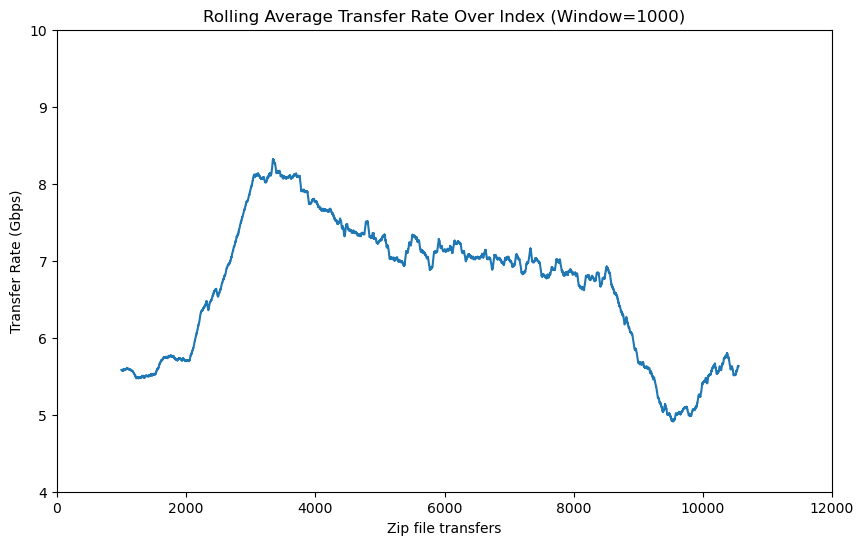

In [20]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'zip']['TRANSFER_RATE'].rolling(window=1000).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=1000)')
plt.xlim(0,12000)
plt.ylim(4, 10)
plt.xlabel('Zip file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

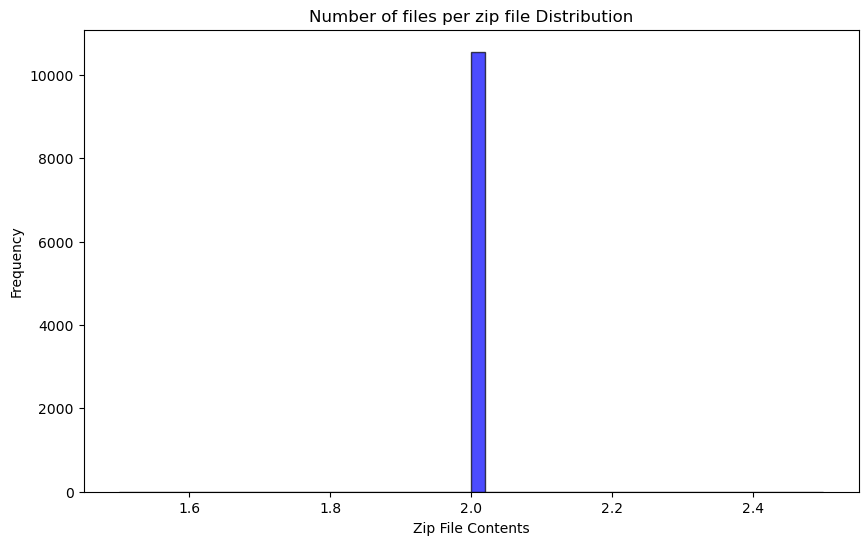

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILES_PER_ZIP'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Number of files per zip file Distribution')
plt.xlabel('Zip File Contents')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
df[df['TRANSFER_RATE'] > 10].sort_values(by='TRANSFER_RATE', ascending=False).head(100)

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,FILES_PER_ZIP,TYPE,TRANSFER_RATE
2205,collated_2859.zip,133880426,butler_wide_20220930/data/hscImports/pdr3_wide...,0.076007,2025-09-03 11:43:06.648261,2025-09-03 11:43:06.724268,False,2,zip,13.123619
4270,collated_4356.zip,133750694,butler_wide_20220930/data/hscImports/pdr3_wide...,0.075978,2025-09-03 12:00:00.379245,2025-09-03 12:00:00.455223,False,2,zip,13.115906
10030,collated_6512.zip,133913278,butler_wide_20220930/data/hscImports/pdr3_wide...,0.076200,2025-09-03 12:42:19.681011,2025-09-03 12:42:19.757211,True,2,zip,13.093591
7533,collated_1389.zip,133673914,butler_wide_20220930/data/hscImports/pdr3_wide...,0.076264,2025-09-03 12:22:53.644898,2025-09-03 12:22:53.721162,False,2,zip,13.059219
2546,collated_5732.zip,133797646,butler_wide_20220930/data/hscImports/pdr3_wide...,0.076390,2025-09-03 11:45:51.331063,2025-09-03 11:45:51.407453,True,2,zip,13.049747
...,...,...,...,...,...,...,...,...,...,...
4074,collated_6470.zip,130151666,butler_wide_20220930/data/hscImports/pdr3_wide...,0.076613,2025-09-03 11:58:41.596617,2025-09-03 11:58:41.673230,False,2,zip,12.657192
7514,collated_6980.zip,131857686,butler_wide_20220930/data/hscImports/pdr3_wide...,0.077621,2025-09-03 12:22:45.448810,2025-09-03 12:22:45.526431,False,2,zip,12.656579
5541,collated_232.zip,131125926,butler_wide_20220930/data/hscImports/pdr3_wide...,0.077204,2025-09-03 12:08:38.926113,2025-09-03 12:08:39.003317,True,2,zip,12.654322
7014,collated_11295.zip,133977666,butler_wide_20220930/data/hscImports/pdr3_wide...,0.078899,2025-09-03 12:18:52.011954,2025-09-03 12:18:52.090853,True,2,zip,12.651762
